# Sarthak Purohit

### Importing Libraries

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.metrics import *

#### Reading Dataset

In [2]:
#data = pd.read_csv("student_scores.csv")
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully!")

Data imported successfully!


In [3]:
#Head (top-5) values
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Plotting all the datapoints

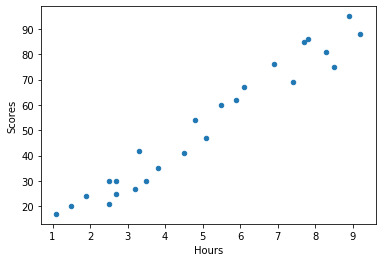

In [4]:
data.plot(kind = 'scatter', x = 'Hours', y = 'Scores')

### Splitting dataset into trainset and testset

Datapoints in Trainset= 20
Datapoints in Testset = 5


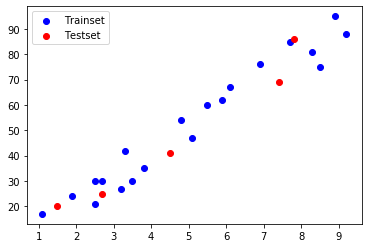

In [5]:
train, test = train_test_split(data, test_size=0.2) 
print("Datapoints in Trainset=",len(train))
print("Datapoints in Testset =",len(test))
plt.scatter(train.Hours,train.Scores,c='blue',label = 'Trainset')
plt.scatter(test.Hours ,test.Scores ,c='red' ,label = 'Testset')
plt.legend()

##### Converting data into tensors

In [6]:
X_train = torch.torch.FloatTensor([[x] for x in list(train.Hours)])
y_train = torch.torch.FloatTensor([[x] for x in list(train.Scores)])

X_test = torch.torch.FloatTensor([[x] for x in list(test.Hours)])
y_test = torch.torch.FloatTensor([[x] for x in list(test.Scores)])

#### Defining Regression Model

In [7]:
#Setting the seed
torch.manual_seed(1)

In [8]:
class LinearRegression(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.lin = nn.Linear(in_features = in_size, out_features = out_size)
    def forward(self, X):
        pred = self.lin(X)
        return(pred)

In [9]:
#Intializing new model with 1 input node and 1 output node
model = LinearRegression(1,1)

#### Helper function to plot model

In [10]:
def plot_model(name):
    plt.title(name)
    plt.xlabel('Hours studied')
    plt.ylabel('Percentage Score')
    
    X1 = np.arange(11)
    X1 = torch.torch.FloatTensor(X1).view(-1,1)
    
    Y1 = model(X1)
    
    X1 = X1.view(-1).detach().numpy()
    Y1 = Y1.view(-1).detach().numpy()
    
    plt.plot(X1, Y1, 'g')
    plt.scatter(X_train,y_train, c='b')
    plt.scatter(X_test,y_test, c='r')
    plt.show()

### Plotting untrained model with datapoints

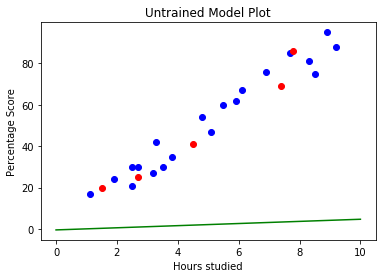

In [11]:
plot_model("Untrained Model Plot")

### Loss and Optimizer

In [12]:
loss_func = nn.MSELoss()
#Initializing the optimizer as Stochastic Gradient Descent with the model parameters and  learning rate 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

## Training the regression model

In [13]:
epochs = 20
epoch_lst =[]
losses = []
for i in range(1,epochs+1):
    optimizer.zero_grad()
    
    y_pred = model.forward(X_train)
    loss = loss_func(y_pred, y_train)
    y_pred_test = model.forward(X_test)
    loss_valid = loss_func(y_pred_test, y_test)
    
    print("Epoch : {} Training Loss : {:.3f}  Validation Loss : {:.3f}".format(i,loss.item(), loss_valid.item()))
    losses.append(loss)
    epoch_lst.append(i)
    
    loss.backward()
    optimizer.step()

Epoch : 1 Training Loss : 3055.350  Validation Loss : 2719.275
Epoch : 2 Training Loss : 396.373  Validation Loss : 335.218
Epoch : 3 Training Loss : 74.191  Validation Loss : 58.265
Epoch : 4 Training Loss : 35.149  Validation Loss : 28.857
Epoch : 5 Training Loss : 30.413  Validation Loss : 26.740
Epoch : 6 Training Loss : 29.835  Validation Loss : 26.989
Epoch : 7 Training Loss : 29.760  Validation Loss : 27.196
Epoch : 8 Training Loss : 29.746  Validation Loss : 27.284
Epoch : 9 Training Loss : 29.739  Validation Loss : 27.318
Epoch : 10 Training Loss : 29.734  Validation Loss : 27.332
Epoch : 11 Training Loss : 29.728  Validation Loss : 27.338
Epoch : 12 Training Loss : 29.723  Validation Loss : 27.342
Epoch : 13 Training Loss : 29.718  Validation Loss : 27.345
Epoch : 14 Training Loss : 29.713  Validation Loss : 27.348
Epoch : 15 Training Loss : 29.708  Validation Loss : 27.351
Epoch : 16 Training Loss : 29.702  Validation Loss : 27.353
Epoch : 17 Training Loss : 29.697  Validati

### Plotting Loss v/s Epoch

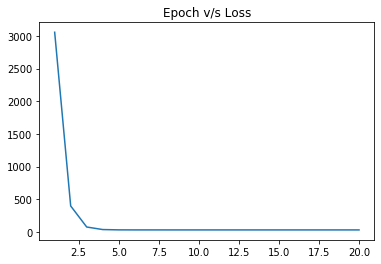

In [14]:
plt.title('Epoch v/s Loss')
plt.plot(range(1,epochs+1), losses)

### Plotting trained model with datapoints

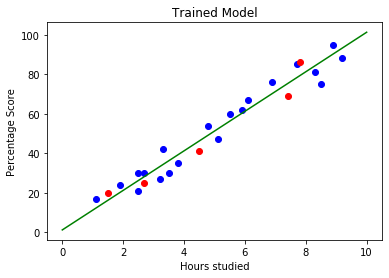

In [15]:
plot_model("Trained Model")

### Making Predictions on testset

In [16]:
y_pred = model.forward(X_test).view(-1).detach().numpy()
y_test = y_test.view(-1).detach().numpy()


df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,41.0,46.250935
1,25.0,28.242231
2,69.0,75.264946
3,86.0,79.266884
4,20.0,16.236431


### Required Prediction

In [17]:
prediction_for = 9.25
x = torch.torch.FloatTensor([prediction_for])
y_pred_test = model.forward(x)
print("Score for {} hours study = {:.1f}".format(prediction_for,float(y_pred_test)))

Score for 9.25 hours study = 93.8


### Performance of model

In [18]:
metrics =['explained_variance_score' , 'max_error' , 'mean_absolute_error' , 'mean_squared_error' , 'mean_squared_log_error' , 'median_absolute_error' , 'r2_score' , 'mean_tweedie_deviance']
values = [explained_variance_score(y_test, y_pred) , max_error(y_test, y_pred) , mean_absolute_error(y_test, y_pred) , mean_squared_error(y_test, y_pred) , 
        mean_squared_log_error(y_test, y_pred) , median_absolute_error(y_test, y_pred) , r2_score(y_test, y_pred) , mean_tweedie_deviance(y_test, y_pred)]

In [19]:
df = pd.DataFrame({'Regression Metric' : metrics , 'Value' : values})  
df

,Regression Metric,Value
0,explained_variance_score,0.958975
1,max_error,6.733116
2,mean_absolute_error,5.050960
3,mean_squared_error,27.366644
4,mean_squared_log_error,0.016106
5,median_absolute_error,5.250935
6,r2_score,0.957856
7,mean_tweedie_deviance,27.366644
